In [1]:
#Import Modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Niño 3.4 index
1.1  Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
#Open the netCDF4 file "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

#Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
# 计算SST anomalies(海表温度异常)，下文用sst_anom表示

#Group data by month
group_data = ds.sst.sel(lat=slice(-5,5),lon=slice(120,170)).groupby('time.month')

#Monthly climatology for sst就是对grouped data求均值，下式可求Niño 3.4区域(5N-5S, 120W-170W)1960-2016年的sst_anom
sst_anom = group_data - group_data.mean(dim='time')

#Check the data
sst_anom.data

array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.6212349 , -0.5504303 , -0.48267746, ..., -0.68665695,
         -0.6161804 , -0.6163101 ],
        [-0.34970474, -0.29545593, -0.3325386 , ..., -0.77547646,
         -0.7685814 , -0.7126312 ],
        [-0.17095375, -0.17284012, -0.23443985, ..., -0.8361454 ,
         -0.82535934, -0.8006687 ],
        [-0.24916267, -0.223135  , -0.2143879 , ..., -0.7794876 ,
         -0.78274345, -0.779541  ],
        [-0.34809303, -0.3074398 , -0.268713  , ..., -0.58963966,
         -0.61

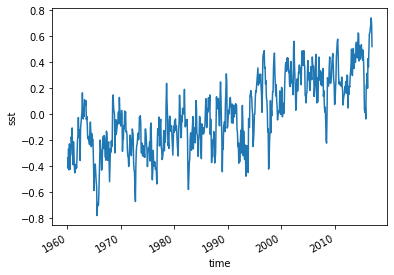

In [4]:
# Niño 3.4 index指的是Niño 3.4区域内的sst_anom 的平均值

#求权重
weights = np.cos(np.deg2rad(sst_anom.lat))

# Compute and plot the correct global monthly SST
sst_anom_weighted = sst_anom.weighted(weights)

#求Niño 3.4区域的sst_anom的平均
Niño34_index = sst_anom_weighted.mean(dim=('lon', 'lat'))
Niño34_index.plot()

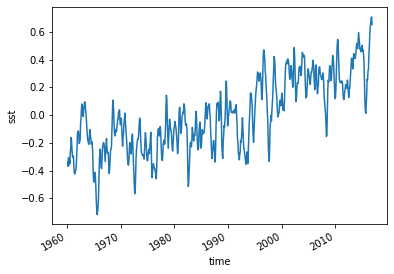

In [5]:
# Niño 3.4 index三个月的滑动平均值
moving_average = Niño34_index.rolling(time=3, center=True).mean()
moving_average.plot()
